### **Importing necessary libraries and parsing the health data, creating a data frame to prevent further parsing processes.**

File parsed successfully with recovery mode.


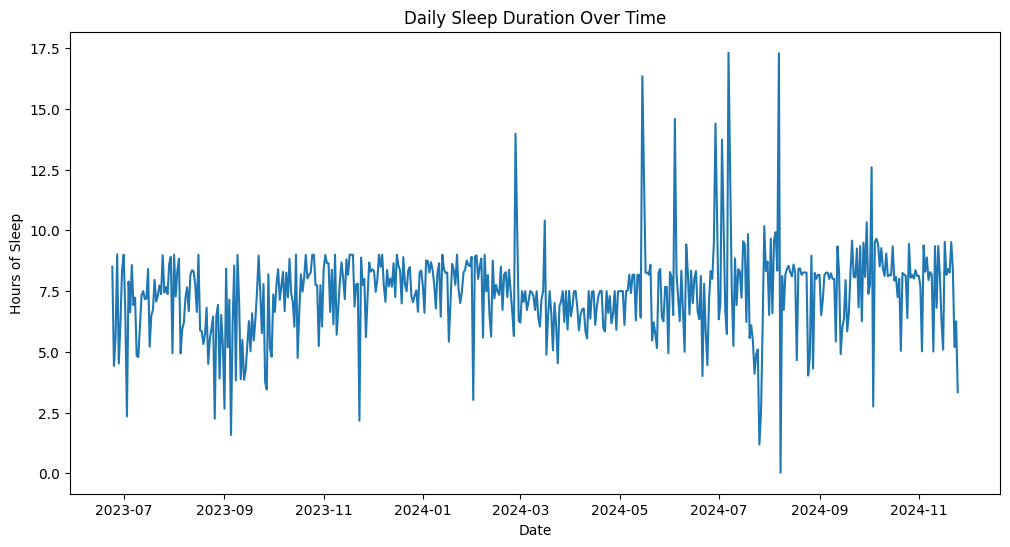

In [3]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lxml import etree

# Load and parse the export.xml file with error recovery
export_xml_path = '/content/export.xml'
try:
    with open(export_xml_path, 'rb') as file:
        tree = etree.parse(file, etree.XMLParser(recover=True))
        root = tree.getroot()
        print("File parsed successfully with recovery mode.")
except etree.XMLSyntaxError as e:
    print(f"Error parsing XML: {e}")

# Prepare a list to collect sleep data
sleep_data = []

# Extract SleepAnalysis records
def parse_date(date_str):
    from datetime import datetime
    return datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S %z")

for record in root.findall('Record'):
    if record.get('type') == 'HKCategoryTypeIdentifierSleepAnalysis':
        start_date = parse_date(record.get('startDate'))
        end_date = parse_date(record.get('endDate'))
        duration_hours = (end_date - start_date).total_seconds() / 3600
        sleep_data.append({
            'start_date': start_date,
            'end_date': end_date,
            'duration_hours': duration_hours
        })

# Create a DataFrame
sleep_df = pd.DataFrame(sleep_data)
sleep_df['date'] = sleep_df['start_date'].dt.date

# Aggregate sleep duration per day
daily_sleep = sleep_df.groupby('date')['duration_hours'].sum().reset_index()

# Prepare for visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sleep, x='date', y='duration_hours')
plt.title('Daily Sleep Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Hours of Sleep')
plt.show()

# Save the DataFrame for further analysis without re-parsing
sleep_df.to_csv('sleep_data_prepared.csv', index=False)


### **Utilizing the preprocessed data**

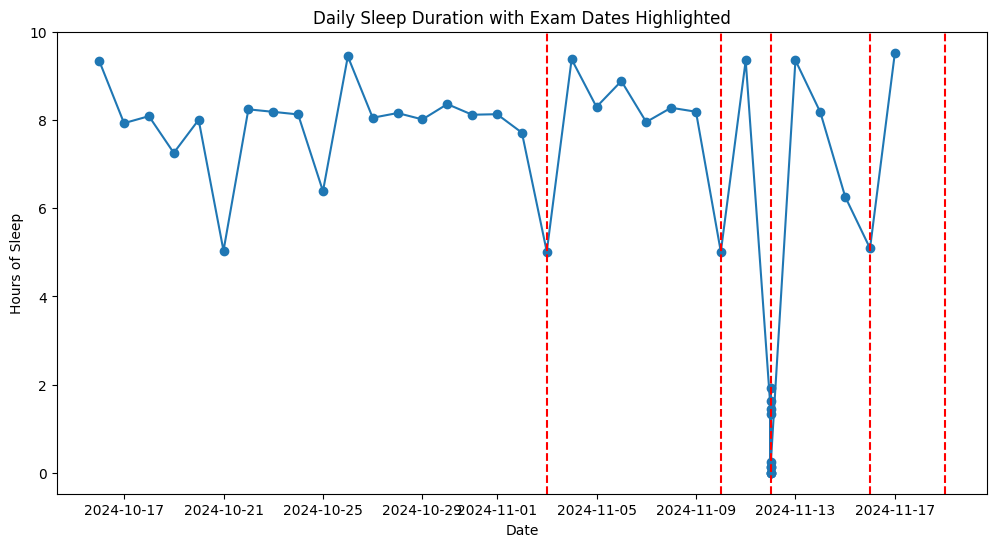

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the previously prepared sleep data
sleep_df = pd.read_csv('sleep_data_prepared.csv')

# Convert 'date' back to datetime for proper plotting
sleep_df['date'] = pd.to_datetime(sleep_df['date'])

# Filter the time period after October 15, 2024, until November 17, 2024
sleep_df = sleep_df[(sleep_df['date'] > pd.to_datetime('2024-10-15')) & (sleep_df['date'] <= pd.to_datetime('2024-11-17'))]

# List of exam dates
exam_dates = [
    pd.to_datetime('2024-11-03'), pd.to_datetime('2024-11-10'), pd.to_datetime('2024-11-12'),
    pd.to_datetime('2024-11-16'), pd.to_datetime('2024-11-19')
]

# Add a column indicating whether the day is an exam date
sleep_df['is_exam'] = sleep_df['date'].isin(exam_dates)

# Visualization 1: Line chart highlighting exam dates as vertical lines
plt.figure(figsize=(12, 6))
plt.plot(sleep_df['date'], sleep_df['duration_hours'], marker='o', linestyle='-')
for exam_date in exam_dates:
    plt.axvline(x=exam_date, color='red', linestyle='--')
plt.title('Daily Sleep Duration with Exam Dates Highlighted')
plt.xlabel('Date')
plt.ylabel('Hours of Sleep')
plt.show()



### **Exam dates explicitly shown as vertical red lines.**

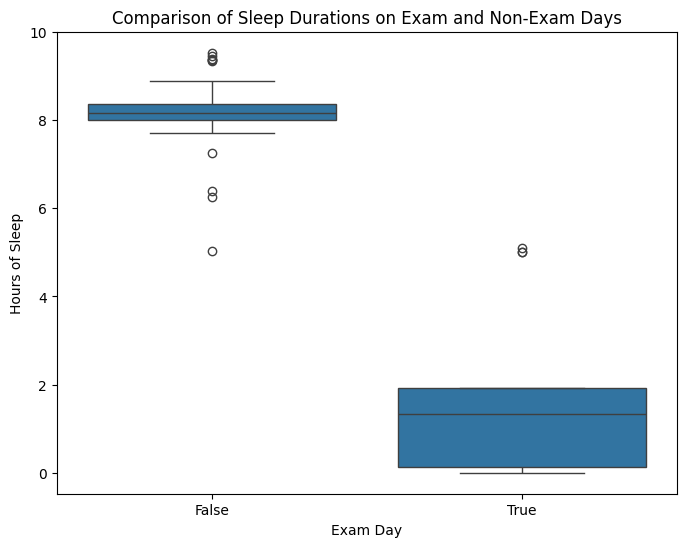

In [23]:
# Visualization 2: Boxplot comparing sleep duration on exam vs non-exam days
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_exam', y='duration_hours', data=sleep_df)
plt.title('Comparison of Sleep Durations on Exam and Non-Exam Days')
plt.xlabel('Exam Day')
plt.ylabel('Hours of Sleep')
plt.show()

### **As shown in the box plot, I frequently sleep 8-10 hours, when there is no exam tomorrow :D**

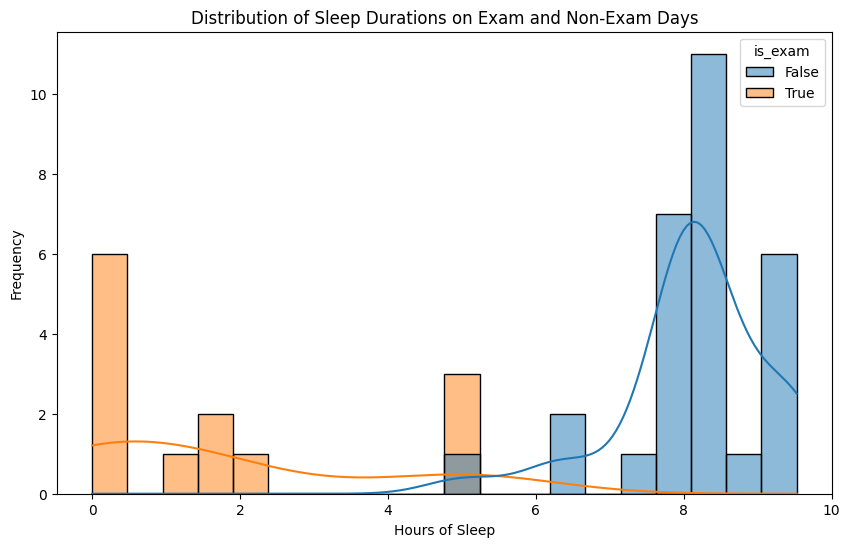

In [24]:
# Visualization 3: Histogram of sleep durations
plt.figure(figsize=(10, 6))
sns.histplot(data=sleep_df, x='duration_hours', hue='is_exam', kde=True, bins=20)
plt.title('Distribution of Sleep Durations on Exam and Non-Exam Days')
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')
plt.show()


### **Frequency of 8-10 hours sleep larger than 6 to 2 hours.**

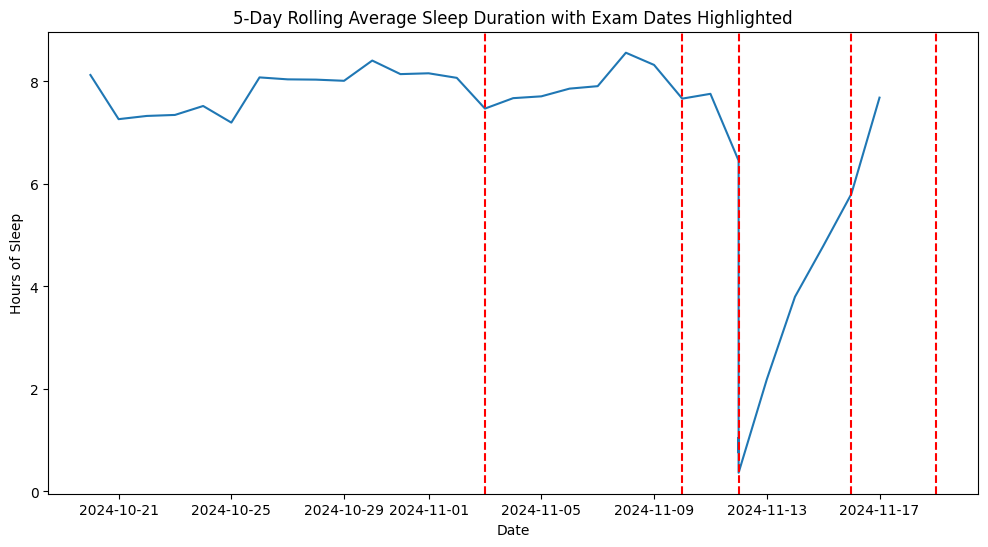

In [25]:
# Visualization 4: Rolling average sleep duration to observe trends
sleep_df['rolling_avg'] = sleep_df['duration_hours'].rolling(window=5).mean()
plt.figure(figsize=(12, 6))
plt.plot(sleep_df['date'], sleep_df['rolling_avg'], marker='', linestyle='-')
for exam_date in exam_dates:
    plt.axvline(x=exam_date, color='red', linestyle='--')
plt.title('5-Day Rolling Average Sleep Duration with Exam Dates Highlighted')
plt.xlabel('Date')
plt.ylabel('Hours of Sleep')
plt.show()

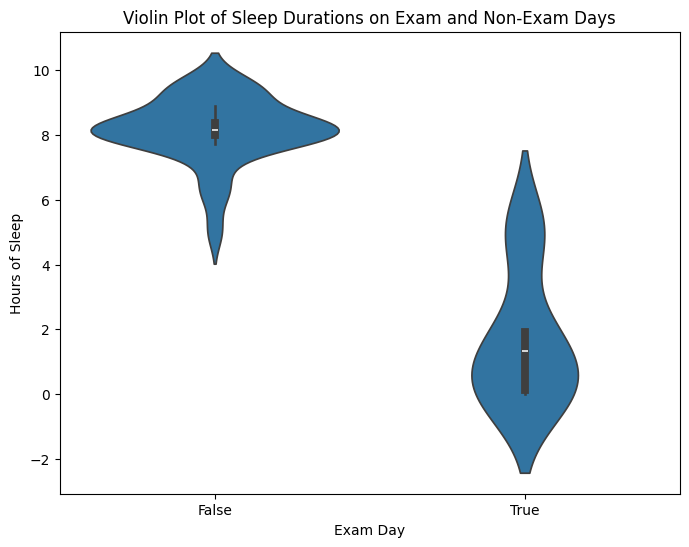

In [26]:
# Visualization 5: Violin plot for sleep distribution
plt.figure(figsize=(8, 6))
sns.violinplot(x='is_exam', y='duration_hours', data=sleep_df)
plt.title('Violin Plot of Sleep Durations on Exam and Non-Exam Days')
plt.xlabel('Exam Day')
plt.ylabel('Hours of Sleep')
plt.show()

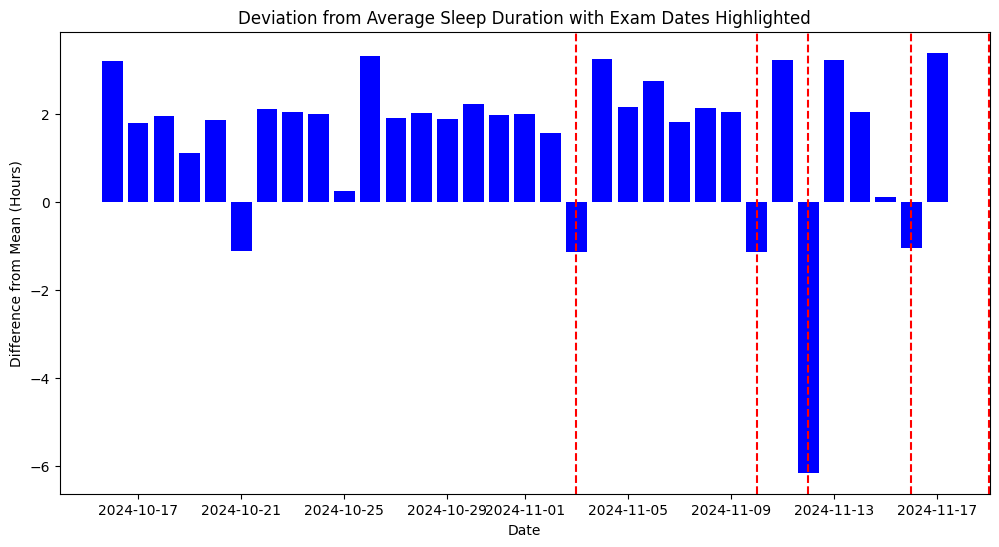

In [27]:
# Visualization 6: Sleep duration difference from mean
mean_sleep = sleep_df['duration_hours'].mean()
sleep_df['difference_from_mean'] = sleep_df['duration_hours'] - mean_sleep
plt.figure(figsize=(12, 6))
plt.bar(sleep_df['date'], sleep_df['difference_from_mean'], color='blue')
for exam_date in exam_dates:
    plt.axvline(x=exam_date, color='red', linestyle='--')
plt.title('Deviation from Average Sleep Duration with Exam Dates Highlighted')
plt.xlabel('Date')
plt.ylabel('Difference from Mean (Hours)')
plt.show()

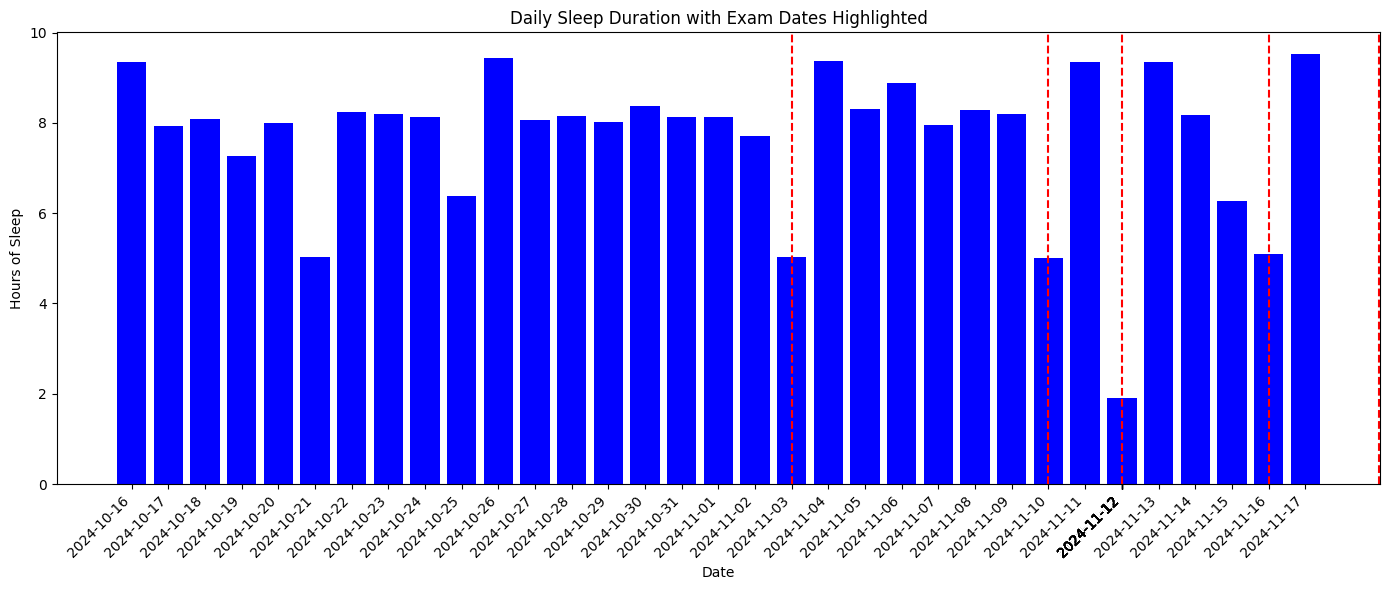

In [28]:
# Visualization: Bar plot showing each day labeled with vertical lines for exam dates
plt.figure(figsize=(14, 6))
plt.bar(sleep_df['date'], sleep_df['duration_hours'], color='blue')
plt.title('Daily Sleep Duration with Exam Dates Highlighted')
plt.xlabel('Date')
plt.ylabel('Hours of Sleep')
plt.xticks(sleep_df['date'], rotation=45, ha='right')

# Adding vertical lines for exam dates
for exam_date in exam_dates:
    plt.axvline(x=exam_date, color='red', linestyle='--')
plt.tight_layout()
plt.show()
